<center><h2>Explainable Machine Learning 2023/2024Z</h2></center>
<center><h3>Homework 4</h3></center>

Mateusz Szymański

# Task A

## Model of choice

We have chosen `RandomForestClassifier` as the tree-based ensemble model baseline. Again, we are examining the `phoneme.csv` dataset.

We are not going into details as this dataset with this particular vanilla model has been introduced earlier.

## Sampled observations

We sampled two observations, of different categories (`TARGET`) and we have calculated the model predictions (`y_pred`) on it, within the probability (`y_prob`).

|      |    V1 |    V2 |    V3 |    V4 |    V5 |   TARGET |   y_prob | y_pred   |
|-----:|------:|------:|------:|------:|------:|---------:|---------:|:---------|
| 4505 | -0.35 | -0.06 |  1.55 | -1.22 | -0.54 |        0 |     0.33 | False    |
| 4948 |  0.11 |  0.50 | -0.20 |  0.29 | -0.48 |        1 |     0.53 | True     |

The model correctly predicted the classes for both examples. However, the second example is very close to the decision boundary (with the default threshold of $0.5$).

### Shapley values

Using both packages, `dalex` and `shap` (with `TreeExplainer`), we estimated the Shapley values for these two observations.

Here are the results.

|  id  | `shap` | `dalex` |
|:----:|:------:|:-------:|
| 4505 | 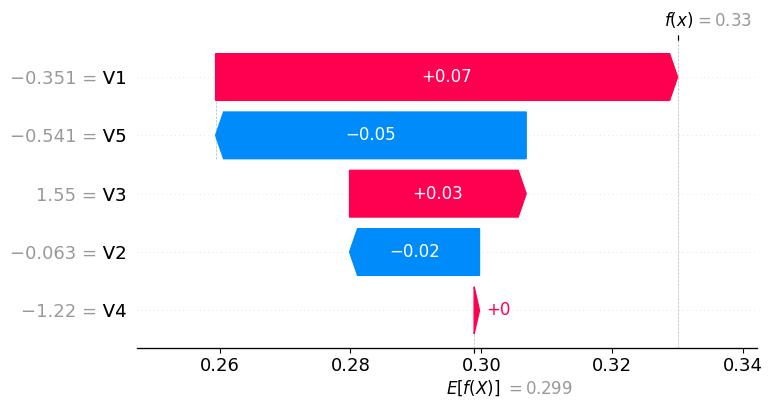</img> | 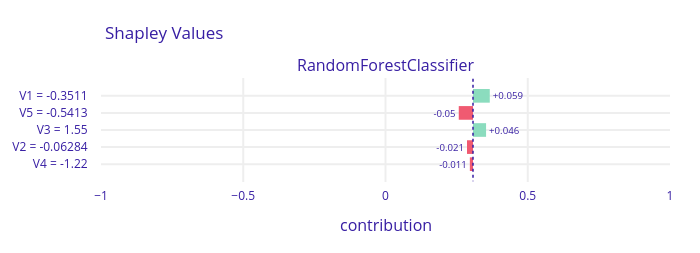</img> |
| 4948 | 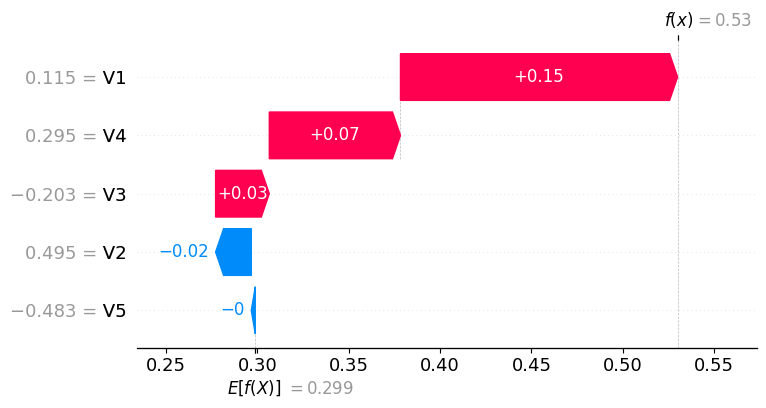</img> | 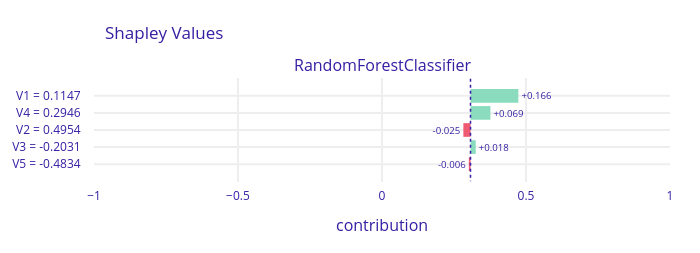</img> |

**Caution**. SHAP values presented by both packages differ. This comes from the fact that Shapley values are not calculated exactly but rather estimated, and there is some stochasticity involved in this process.

In `dalex` package, permutations involved in Shapley values formula are sampled. By default, $25$ permutations are taken. However, `shap`, uses `TreeSHAP` algorithm for estimating Shapley values, designed for tree-based decision models.

Having that in my mind, we see that two estimates of Shapley values agree on direction of the variable's effect, but in the second example the order of the variables is not preserved. These differences are rather minor.

## Different importances

Let us find two observations that have different variables of the highest importance. As all Shapley values are easily calculated using `shap` package, we sorted all observations by the size of the impact of selected variables.

More precisely, we have found observations of the maximal value of:
* $|\phi(\textrm{V1})\cdot \phi(\textrm{V4})|$
* $|\phi(\textrm{V2})\cdot \phi(\textrm{V3})|$

Here are the details of these observations:

|     |    V1 |    V2 |    V3 |    V4 |    V5 |   TARGET |   y_prob | y_pred   |
|----:|------:|------:|------:|------:|------:|---------:|---------:|:---------|
| 513 | -0.23 | -0.15 |  1.45 |  1.71 | -0.14 |        1 |     0.89 | True     |
| 472 | -1.17 | -2.25 | -1.69 | -1.30 | -0.69 |        0 |     0.89 | True     |

The model missclassified one of the observations.

Let us see the corresponding estimated Shapley values:

|  id  | `shap` | `dalex` |
|:----:|:-------:|:------:|
|  513 | 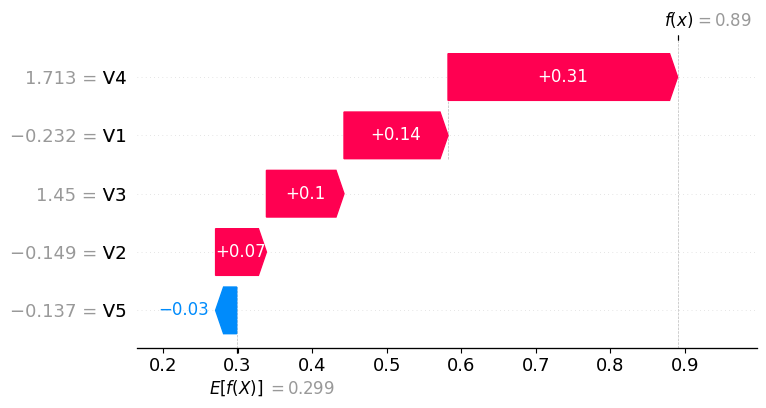</img> | 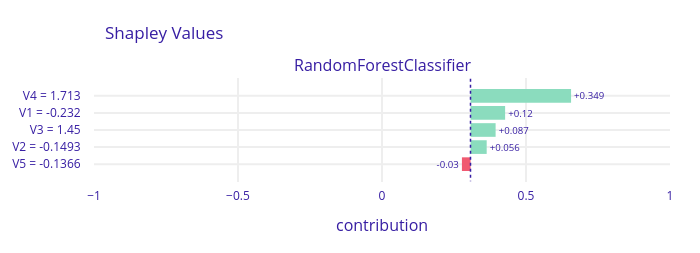</img> |
|  472 | 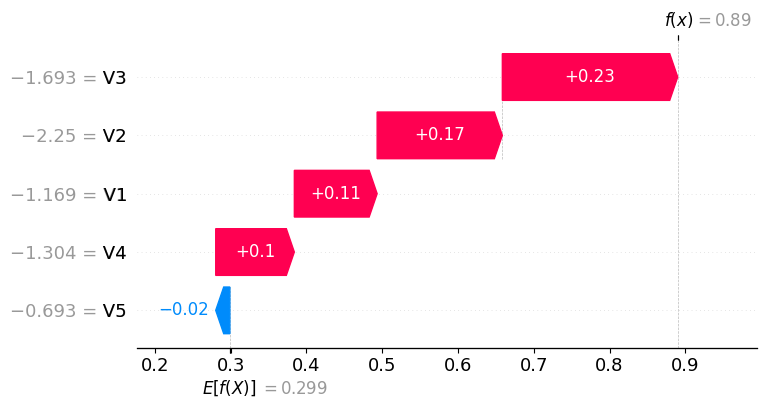</img> | 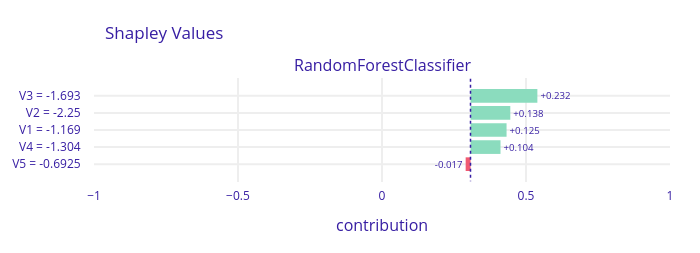</img> |

Again, both packages are more or less agreeing with each other. Almost all variables in both cases are of positive effect on the classifier.

It seems that the small values of `V4` is of a small importance for the model, similarly for high values of `V3`. These two observations happen to have these two variables on opposite sides of the distribution. Yet, predictions on these are the same.

## Different attributions of the same variable

In the previous example we have noticed that `V4` is, in general, the strongest indicator of the target variable. By sorting Shapley values for that variable, we can easily find the extreme cases for which `V4` had different direction of the attribution.

|      |    V1 |    V2 |    V3 |    V4 |    V5 |   TARGET |   y_prob | y_pred   |
|-----:|------:|------:|------:|------:|------:|---------:|---------:|:---------|
| 4691 | -0.59 | -0.05 | -0.24 | -0.11 | -0.14 |        0 |     0.05 | False    |
|  828 | -0.59 | -0.21 |  0.32 |  1.10 | -0.14 |        1 |     0.94 | True     |

|  id  | `shap` | `dalex` |
|:----:|:-------:|:------:|
|  513 | 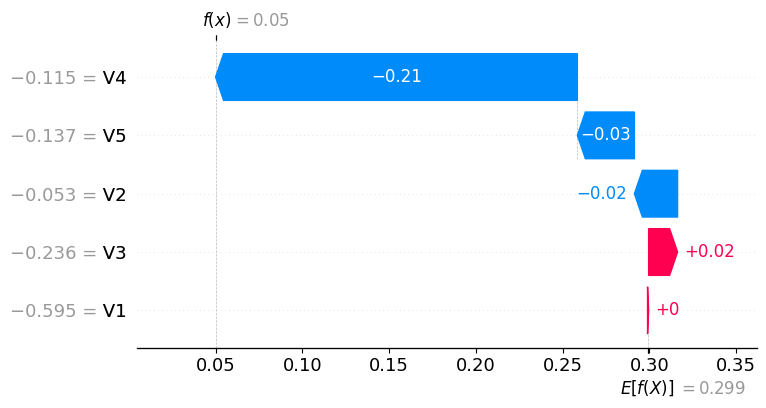</img> | 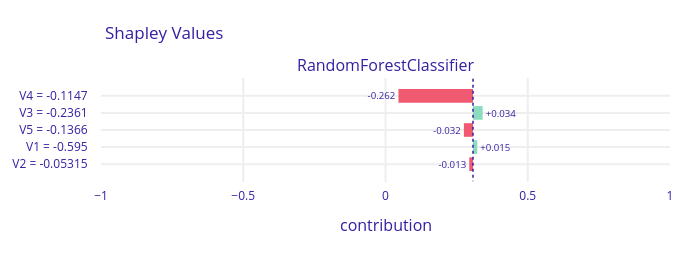</img> |
|  472 | 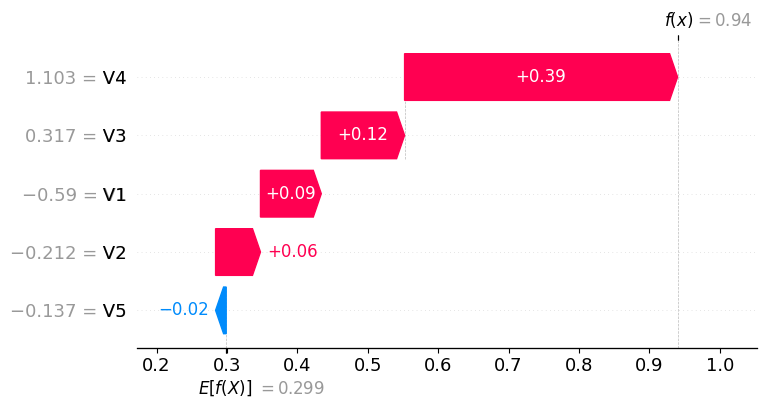</img> | 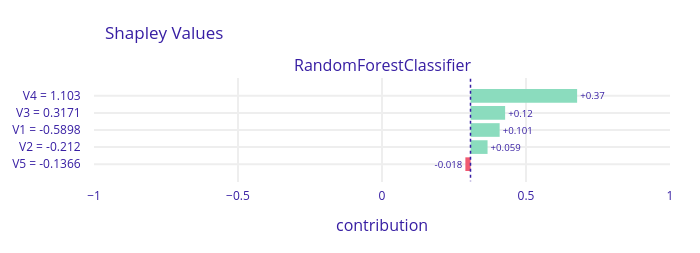</img> |

These examples show how strong the decisions of `RandomForestClassifier` are, and how big influence has `V4` on that (`y_prob` values are close to either $0$ or $1$). These predictions are correct and, indeed, `V4` is the strongest indicator in both observations.

## Different attributions for different models

Problem of different attributions have been partially discussed in the previous example. Let us dive into it once again.

In the previous example we have trained a logistic regression model for the same task as `RandomForestClassifier`. We are going to use that model. 

### Logistic regression

We trained a logistic regression model on the same data. Using Shapley values, we found an observation for which `V4` attribution differs the most.

|     |    V1 |    V2 |    V3 |    V4 |    V5 |   TARGET |   y_prob | y_pred   |   lr_prob | lr_pred   |
|----:|------:|------:|------:|------:|------:|---------:|---------:|:---------|----------:|:----------|
| 789 | -1.05 | -2.04 | -2.11 | -2.49 | -0.14 |        0 |     0.97 | True     |      0.10 | False     |

We can see that this particular observation is differently categorized by these two models (`lr_pred` is different than `y_pred`). This time, `RandomForestClassifier` got it wrong.

Let us see these attributions:

|  id  | `shap` | `dalex` |
|:----:|:-------:|:------:|
| `RandomForestClassifier` | 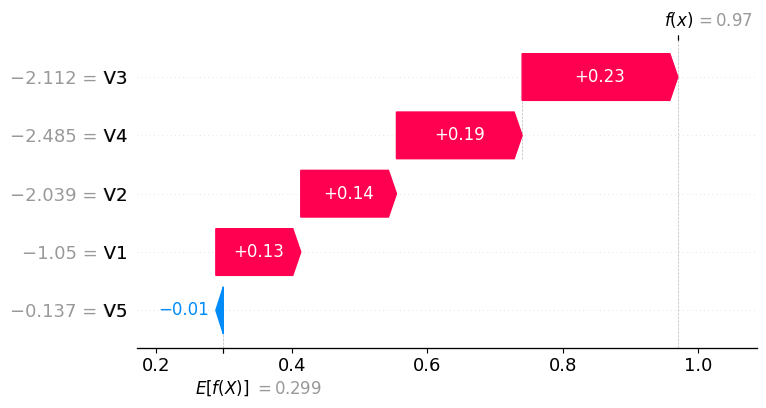</img> | 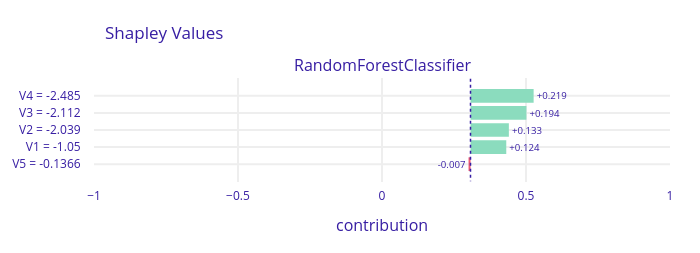</img> |
| `LogisticRegression `| 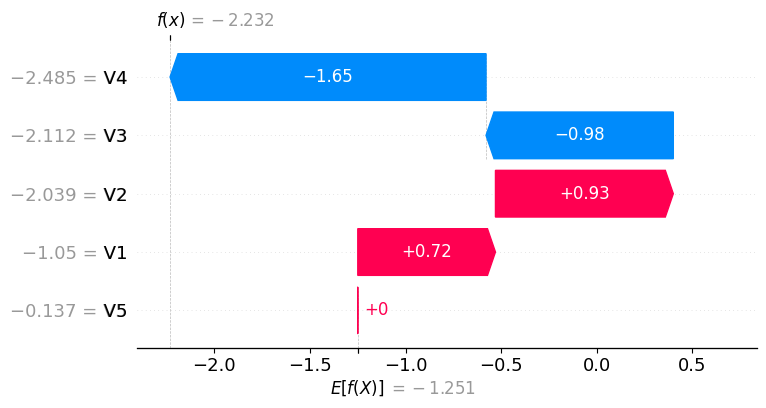</img> | 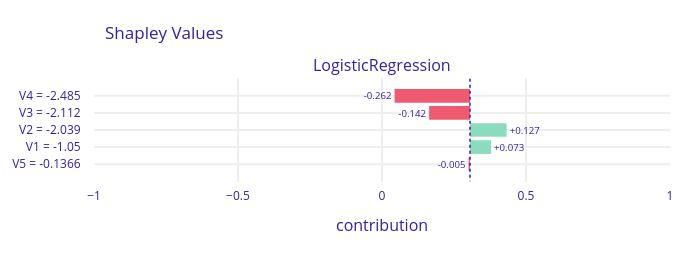</img> |

**Caution**: In case of a logistic regression model, `shap` package operates on values before passing through sigmoid function. Hence explanations given by both packages are different, but one can see that there is a clear correspondence between them.

For both models, variables `V3` and `V4` turned out to be decisive. However, for the same observation these attributions were on opposite directions. Since the random forest model got a wrong prediction, this particular example may help explore the model behavior in the neighborhood of this observation. It may happen that this model is consistently wrong about observations similar to this one.

# Task B

The goal of the task is to calculate Shapley values for the following value function $v$, described for all subsets of $\mathcal{A}=\{A,B,C\}$:

|   coalition   | value |
|:-------------:|:-----:|
| $\emptyset$   | 0     |
| $A$           | 20    |
| $B$           | 20    |
| $C$           | 60    |
| $A$, $B$      | 60    |
| $A$, $C$      | 70    |
| $B$, $C$      | 70    |
| $A$, $B$, $C$ | 100   |

We are going to calculate Shapley values by hand using one of Shapley values definition (of course:

$${\displaystyle \phi _{i}(v)=\sum _{S\subseteq \mathcal{A}\setminus \{i\}}{\frac {|S|!\;\left(|\mathcal{A}|-|S|-1\right)!}{|\mathcal{A}|!}}\left(v(S\cup \{i\})-v(S)\right)}$$

For each element $X\in \mathcal{A}$ we need to consider all possible subsets not containing $X$.

## Value of $\phi_A$

Consider all subsets of $\mathcal{A}$ not containing $A$ and call it $\mathcal{A}_{-A}$:

$$\mathcal{A}_{-A} = \left\{\emptyset, \{B\}, \{C\}, \{A, B\}\right\}$$

Using the formula above, we can calculate each summand $\phi_{A;S}$ for each $S\subseteq\mathcal{A}\setminus\{A\}$:

|element|calculation|value|
|:-----:|:---------:|:---:|
|$$\phi_{A;\emptyset}$$|$$\frac{0!\cdot 2!}{3!}\left(v(\{A\})-v(\emptyset)\right)=\frac{2}{6}\left(20-0\right)$$|$\frac{20}{3}$|
|$$\phi_{A;\{B\}}$$|$$\frac{1!\cdot 1!}{3!}\left(v(\{A,B\})-v(\{B\}\right)=\frac{1}{6}\left(60-20\right)$$|$\frac{20}{3}$|
|$$\phi_{A;\{C\}}$$|$$\frac{1!\cdot 1!}{3!}\left(v(\{A,C\})-v(\{C\}\right)=\frac{1}{6}\left(70-60\right)$$|$\frac{10}{6}$|
|$$\phi_{A;\{B, C\}}$$|$$\frac{2!\cdot 0!}{3!}\left(v(\{A,B,C\})-v(\{B,C\}\right)=\frac{2}{6}\left(100-70\right)$$|$10$|

Therefore:

$$\phi_A=\phi_{A;\emptyset}+\phi_{A;\{B\}}+\phi_{A;\{C\}}+\phi_{A;\{B,C\}}=\tfrac{20}{3}+\tfrac{20}{3}+\tfrac{10}{6}+10=25$$

## Value of $\phi_B$

Due to symmetry of values $v$, one can observe that the value $\phi_B=\phi_A$ as all contributions of $B$ are analogous to contributions of $A$ when the role of $A$ and $B$ is interchanged.

Hence, $\phi_B = 25$ as well.

## Value of $\phi_C$

The sum of all Shapley values is equal to the value of the grand coalition. Then:

$$\phi_A + \phi_B + \phi_C = v(\{A,B,C\})$$

This gives us:

$$\phi_C = v(\{A,B,C\}) - \phi_A - \phi_B = 100 - 25 - 25 = 50$$

## Summary

All Shapley values have been calculated:

$$\phi_A = 25,\ \phi_B = 25,\, \phi_C = 50$$

# Appendix

## Package import

In [1]:
import io
import random

from itertools import combinations

import shap
import dalex as dx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from plotly.io import to_image
from IPython.display import Markdown
from IPython.display import Image

from scipy.special import binom

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm

## Constants

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.75

NUM_COLUMNS = 5

THRESHOLD = 0.5

In [3]:
def seed(random_state=RANDOM_STATE):
    np.random.seed(random_state)
    random.seed(random_state)
    
    
seed()

## Data loading

In [4]:
df = pd.read_csv('datasets/phoneme.csv').iloc[:, 1:]
df['TARGET'] = df['TARGET'] - 1  # we shift the values as originally they are from the set {1, 2} instead of {1, 2}
X = df.iloc[:, :-1]
y = df.iloc[:, -1].to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

## Model training

In [6]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
random_forest.fit(X_train, y_train)
print('Test accuracy: {:.2f}%.'.format(100 * random_forest.score(X_test, y_test)))

Test accuracy: 87.02%.


In [7]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
print('Test accuracy: {:.2f}%.'.format(100 * logistic_regression.score(X_test, y_test)))

Test accuracy: 76.56%.


## Sample selection

In [8]:
seed()
index_negative = np.random.choice(df[df['TARGET'] == 0].index)
index_positive = np.random.choice(df[df['TARGET'] == 1].index)
indices = np.array([index_negative, index_positive])

In [9]:
indices

array([4505, 4948])

In [10]:
def get_predictions_df(indices=indices, df=df):
    predictions_proba = random_forest.predict_proba(X.loc[indices])[:, 1]
    df_predictions = df.loc[indices].copy()
    df_predictions['y_prob'] = predictions_proba
    df_predictions['y_pred'] = predictions_proba >= THRESHOLD
    return df_predictions

In [11]:
get_predictions_df()

,V1,V2,V3,V4,V5,TARGET,y_prob,y_pred
4505,-0.351143,-0.062835,1.549588,-1.219647,-0.541349,0,0.33,False
4948,0.114717,0.495400,-0.203104,0.294597,-0.483366,1,0.53,True


## `dalex`

In [12]:
explainer = dx.Explainer(random_forest, X, y)
explainer.model_performance()

Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : 5404 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ff6002d31a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.307, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.98, mean = -0.014, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


/home/mateusz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.85372,0.819117,0.836061,0.901739,0.955736


In [19]:
def show_plotly_image(figure):
    image = to_image(figure)
    return Image(image)

## SHAP

In [20]:
seed()
shap_explainer = shap.TreeExplainer(random_forest, X_train)
shap_values = shap_explainer(X)
shap_values = shap_values[:, :, 1]

 99%|===================| 10678/10808 [01:21<00:00]        

RandomForestClassifier


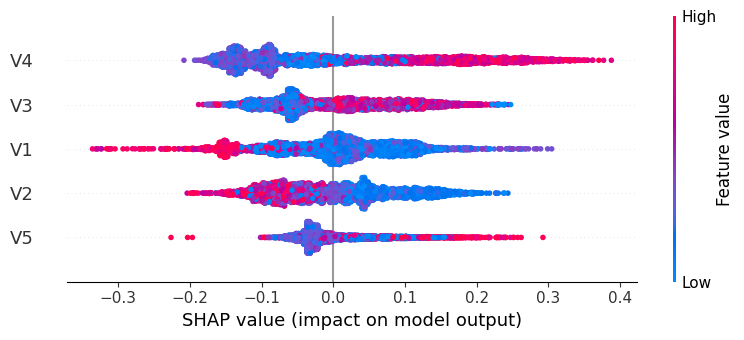

In [21]:
print('RandomForestClassifier')
shap.summary_plot(shap_values, sort=True)

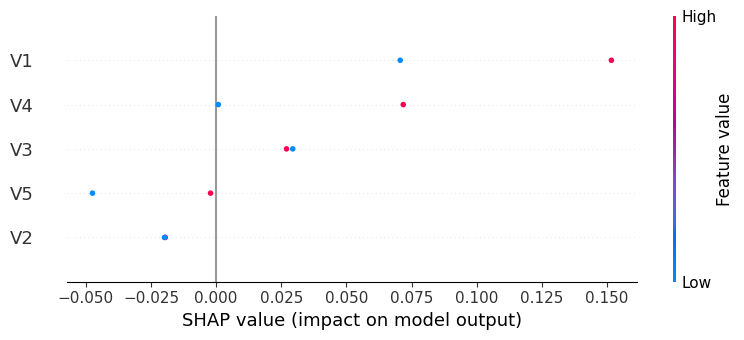

In [22]:
shap.summary_plot(shap_values[indices], sort=True)

In [23]:
def show_shap(indices=indices, X=X, shap_values=shap_values):
    seed()
    for index in indices:
        shap_attributions = explainer.predict_parts(df.iloc[:, :NUM_COLUMNS].loc[index], type='shap')
        figure = shap_attributions.plot(min_max=[-1.0, 1.0], show=False)

        display(df.loc[[index]])
        display(show_plotly_image(figure))
        shap.plots.waterfall(shap_values[index])

,V1,V2,V3,V4,V5,TARGET
4505,-0.351143,-0.062835,1.549588,-1.219647,-0.541349,0


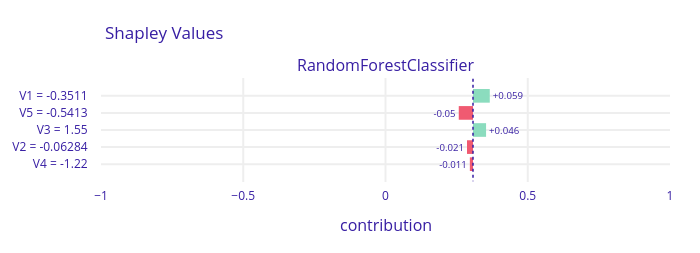

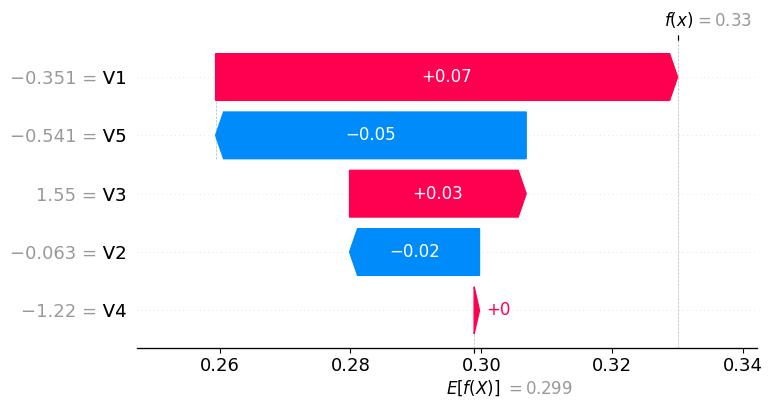

,V1,V2,V3,V4,V5,TARGET
4948,0.114717,0.4954,-0.203104,0.294597,-0.483366,1


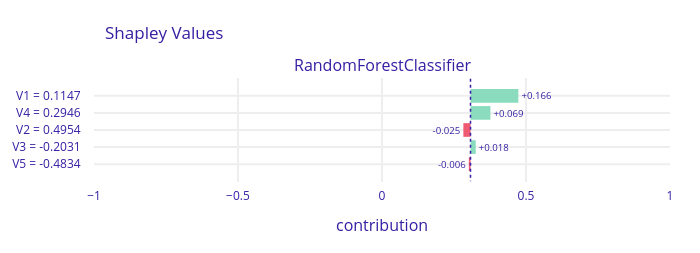

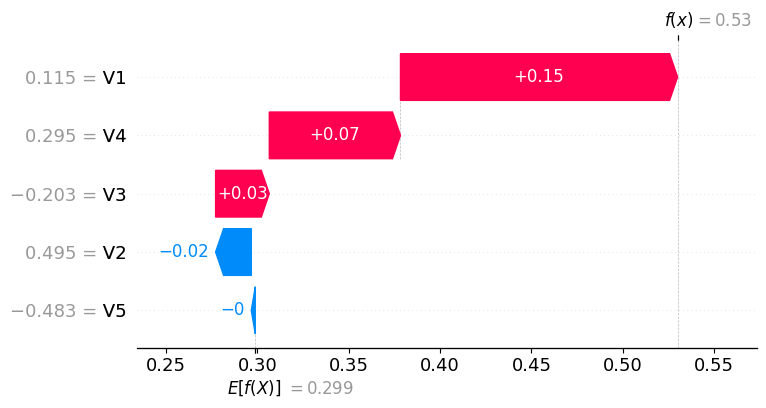

In [24]:
show_shap()

In [25]:
# collect indices of observations with the strongest attributions for two different variables
diff_indices = [
    np.argmax(np.abs(shap_values[:, 0].values * shap_values[:, 3].values)),
    np.argmax(np.abs(shap_values[:, 1].values * shap_values[:, 2].values))
]

In [26]:
get_predictions_df(indices=diff_indices)

,V1,V2,V3,V4,V5,TARGET,y_prob,y_pred
513,-0.231975,-0.149292,1.450239,1.713089,-0.136583,1,0.89,True
472,-1.168874,-2.250384,-1.692687,-1.304129,-0.692537,0,0.89,True


,V1,V2,V3,V4,V5,TARGET
513,-0.231975,-0.149292,1.450239,1.713089,-0.136583,1


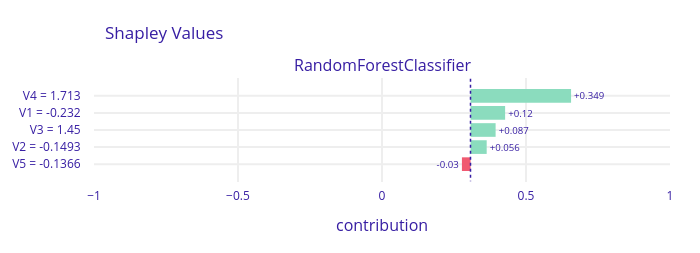

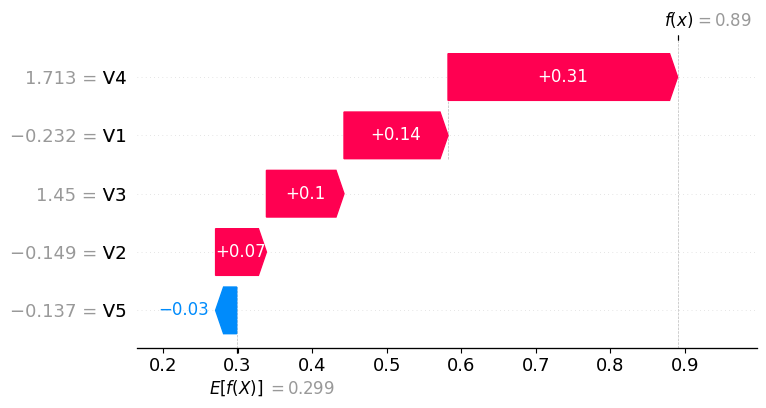

,V1,V2,V3,V4,V5,TARGET
472,-1.168874,-2.250384,-1.692687,-1.304129,-0.692537,0


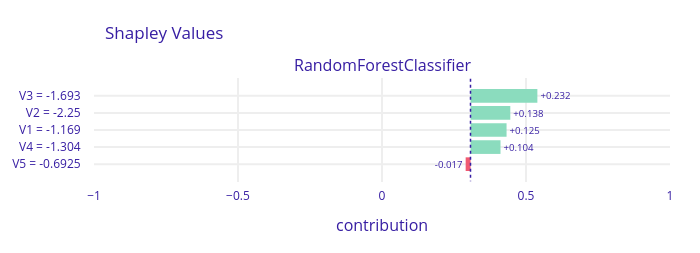

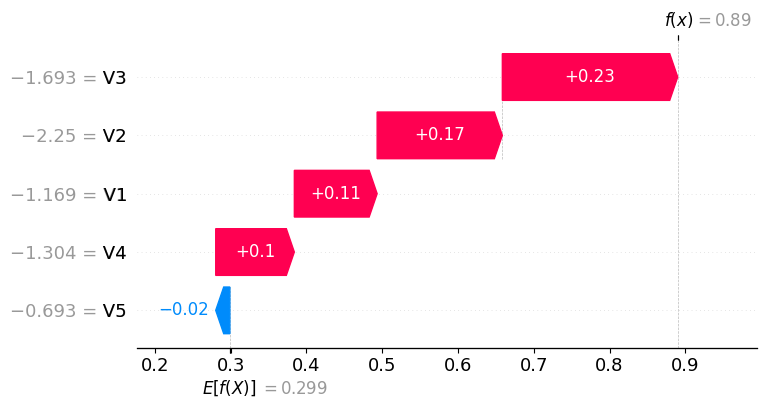

In [27]:
show_shap(diff_indices)

### Different attributions

,V1,V2,V3,V4,V5,TARGET,y_prob,y_pred
4691,-0.594952,-0.053153,-0.236098,-0.114693,-0.136583,0,0.05,False
828,-0.589772,-0.212038,0.317146,1.102768,-0.136583,1,0.94,True


,V1,V2,V3,V4,V5,TARGET
4691,-0.594952,-0.053153,-0.236098,-0.114693,-0.136583,0


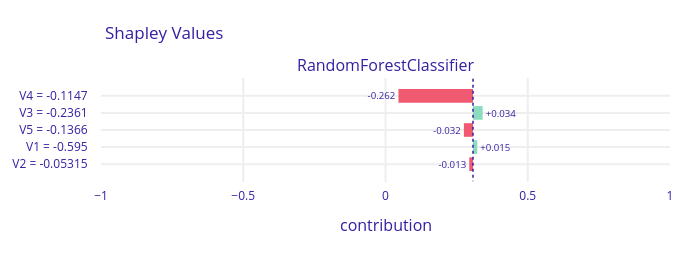

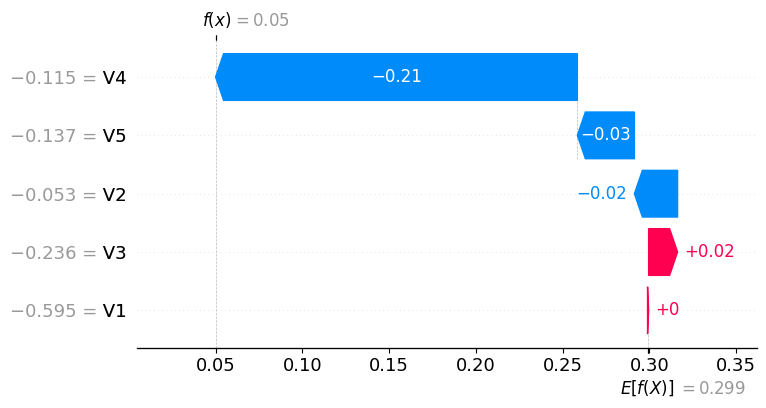

,V1,V2,V3,V4,V5,TARGET
828,-0.589772,-0.212038,0.317146,1.102768,-0.136583,1


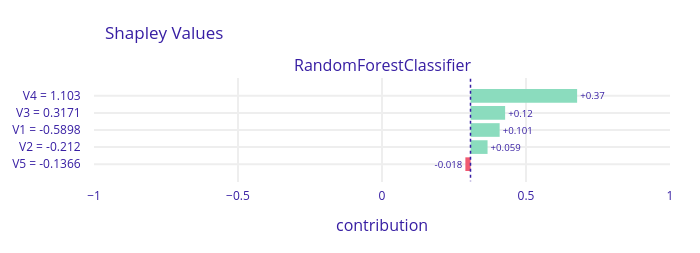

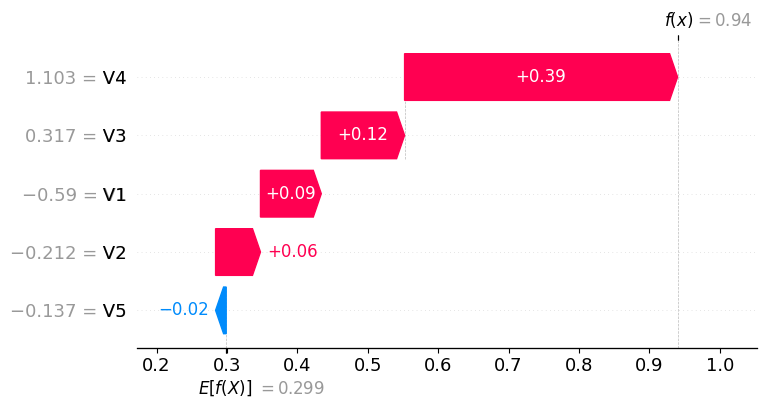

In [28]:
v4_indices = np.argsort(shap_values[:, 3].values)
v4_indices = [v4_indices[0], v4_indices[-1]]
display(get_predictions_df(v4_indices))
show_shap(v4_indices)

## Logistic  regression

In [30]:
lr_explainer = dx.Explainer(logistic_regression, X, y)
lr_explainer.model_performance()

Preparation of a new explainer is initiated

  -> data              : 5404 rows 5 cols
  -> target variable   : 5404 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ff6002d31a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0126, mean = 0.306, max = 0.876
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.876, mean = -0.0122, max = 0.978
  -> model_info        : package sklearn

A new explainer has been created!


/home/mateusz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



,recall,precision,f1,accuracy,auc
LogisticRegression,0.553594,0.61831,0.584165,0.76869,0.808701


In [31]:
seed()
shap_lr_explainer = shap.Explainer(logistic_regression, X_train)
shap_lr_values = shap_lr_explainer(X)

In [33]:
comparison_index = np.argmax(shap_values.values[:, 3] - shap_lr_values.values[:, 3])
comparison_indices = [comparison_index]
prediction = logistic_regression.predict_proba(X.loc[[comparison_index]])[:, 1]

df_comparison = get_predictions_df(comparison_indices)
df_comparison['lr_prob'] = prediction
df_comparison['lr_pred'] = prediction >= THRESHOLD

In [34]:
print(df_comparison.to_markdown(floatfmt='0.2f'))

|     |    V1 |    V2 |    V3 |    V4 |    V5 |   TARGET |   y_prob | y_pred   |   lr_prob | lr_pred   |
|----:|------:|------:|------:|------:|------:|---------:|---------:|:---------|----------:|:----------|
| 789 | -1.05 | -2.04 | -2.11 | -2.49 | -0.14 |        0 |     0.97 | True     |      0.10 | False     |


,V1,V2,V3,V4,V5,TARGET
789,-1.050485,-2.03916,-2.111571,-2.48534,-0.136583,0


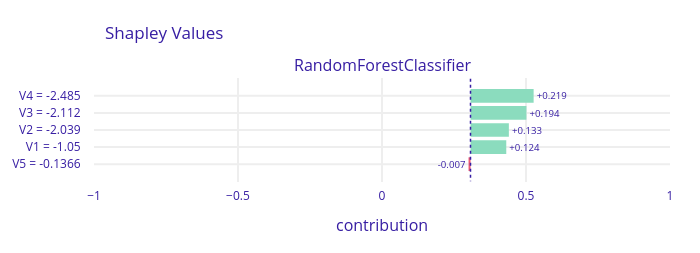

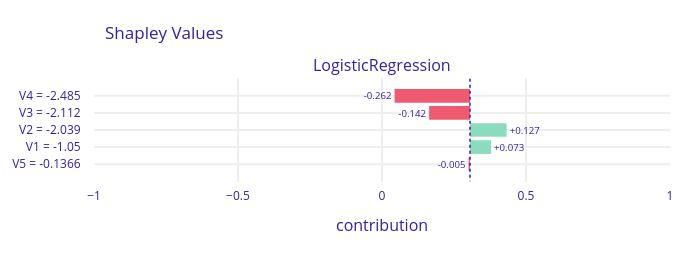

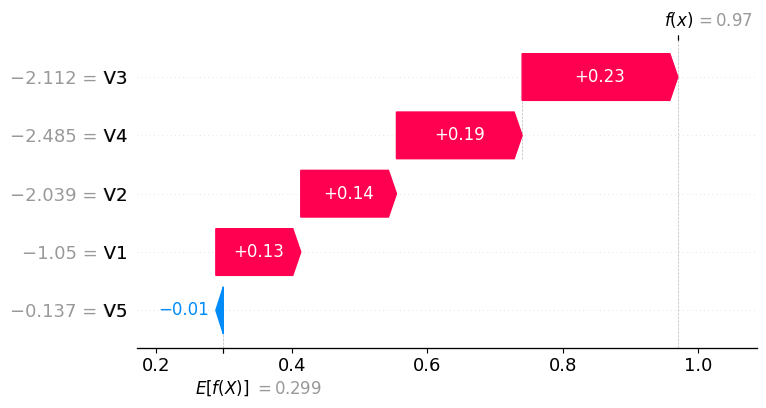

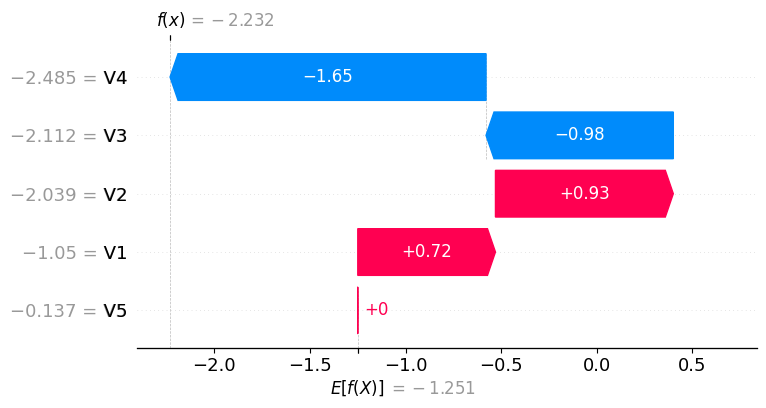

In [35]:
seed()

display(df.loc[[comparison_index]])

shap_attributions = explainer.predict_parts(df.iloc[:, :NUM_COLUMNS].loc[comparison_index], type='shap')
shap_lr_attributions = lr_explainer.predict_parts(df.iloc[:, :NUM_COLUMNS].loc[comparison_index], type='shap')

figure = shap_attributions.plot(min_max=[-1.0, 1.0], show=False)
lr_figure = shap_lr_attributions.plot(min_max=[-1.0, 1.0], show=False)

display(show_plotly_image(figure))
display(show_plotly_image(lr_figure))

shap.plots.waterfall(shap_values[comparison_index])
shap.plots.waterfall(shap_lr_values[comparison_index])

## Task B

In [ ]:
elements = {'A', 'B', 'C'}
value_function = {
    tuple():           0,
    ('A',):           20,
    ('B',):           20,
    ('C'):            60,
    ('A', 'B'):       60,
    ('A', 'C'):       70,
    ('B', 'C'):       70,
    ('A', 'B', 'C'): 100
}

In [ ]:
# naive implementation of Shapley values
def shapley_values(elements, value_function):
    assert value_function[tuple()] == 0, 'value function of the empty set should be 0'
    value_function = {
        tuple(sorted(set(item))): value
        for item, value in value_function.items()
    }
    
    n = len(elements)
    shapley = {player: 0 for player in sorted(elements)}
    
    for player in elements:
        coalitions = [p for p in elements if p != player]
        for subset_size in range(0, n):
            for coalition in combinations(coalitions, subset_size):
                without_player = tuple(sorted(coalition))
                with_player = tuple(sorted(set(coalition).union({player})))
                coefficient = n * binom(n - 1, subset_size)
                shapley[player] += (value_function[with_player] - value_function[without_player]) / coefficient

    return shapley

In [ ]:
shapley = shapley_values(tuple(elements), value_function)
for key, value in shapley.items():
    display(Markdown('$\phi_{key}$: ${value:.0f}$'.format(
        key=key,
        value=value
    )))